In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
data = pd.read_csv('/content/Fraud.csv')

In [ ]:
data.head(30)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


In [ ]:
data.tail(30)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
764016,38,PAYMENT,2572.26,C1201855550,36.00,0.00,M758067762,0.00,0.00,0.0,0.0
764017,38,PAYMENT,20106.64,C1504953657,0.00,0.00,M1596307615,0.00,0.00,0.0,0.0
764018,38,PAYMENT,16299.61,C238541929,22470.00,6170.39,M1516093759,0.00,0.00,0.0,0.0
764019,38,CASH_OUT,71181.84,C494947648,5169.00,0.00,C203080995,0.00,71181.84,0.0,0.0
764020,38,CASH_IN,88203.57,C1863581487,562562.00,650765.57,C1737657209,33004.96,0.00,0.0,0.0
764021,38,CASH_OUT,56809.42,C1601675824,35993.00,0.00,C666569070,361794.50,418603.92,0.0,0.0
764022,38,CASH_OUT,96487.72,C1796719832,89403.00,0.00,C2033913080,2752237.44,2848725.16,0.0,0.0
764023,38,CASH_OUT,319274.93,C1952607927,89064.71,0.00,C1536801278,0.00,319274.93,0.0,0.0
764024,38,PAYMENT,9302.46,C83369363,0.00,0.00,M1719421214,0.00,0.00,0.0,0.0
764025,38,PAYMENT,1484.56,C865628173,0.00,0.00,M1416144671,0.00,0.00,0.0,0.0


In [ ]:
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,764046.000000,7.640460e+05,7.640460e+05,7.640450e+05,7.640450e+05,7.640450e+05,764045.000000,764045.0
mean,19.968332,1.640058e+05,8.748076e+05,8.951720e+05,9.824438e+05,1.136910e+06,0.000580,0.0
std,9.719200,2.689861e+05,2.940779e+06,2.977710e+06,2.315030e+06,2.454680e+06,0.024072,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,13.000000,1.296193e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,17.000000,7.926899e+04,1.654400e+04,0.000000e+00,1.230431e+05,2.216094e+05,0.000000,0.0
75%,24.000000,2.198965e+05,1.488147e+05,1.896823e+05,9.113926e+05,1.178829e+06,0.000000,0.0
max,38.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.148270e+07,4.148270e+07,1.000000,0.0


In [ ]:
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=[np.number]).columns

In [ ]:
categorical_cols

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [ ]:
numerical_cols

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [ ]:
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))


In [ ]:
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

In [ ]:
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [ ]:
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1


In [ ]:
# Define a cap
cap = 1.5 * IQR
data = data[~((data[numerical_cols] < (Q1 - cap)) | (data[numerical_cols] > (Q3 + cap))).any(axis=1)]


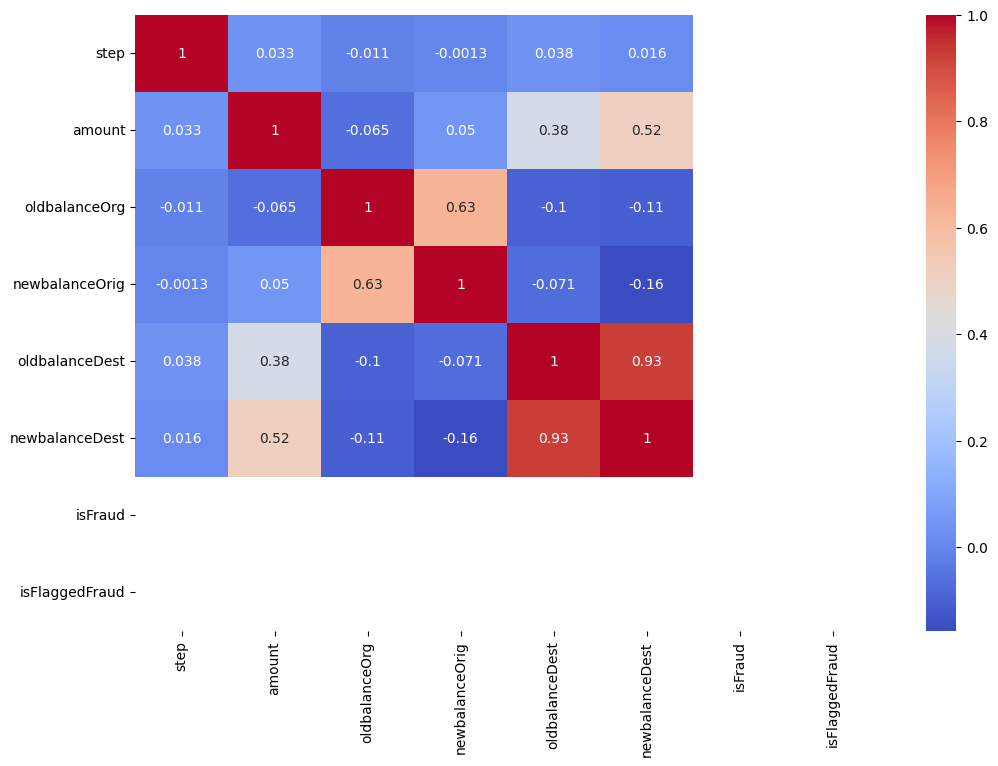

In [ ]:
corr_matrix = data[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Data types:
 step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object
Unique values in each column:
 step                  210
type                    5
amount            2445809
nameOrig          2667126
oldbalanceOrg      886853
newbalanceOrig    1155975
nameDest          1132643
oldbalanceDest    1536055
newbalanceDest    1373969
isFraud                 2
isFlaggedFraud          1
dtype: int64
First few rows:
    step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671

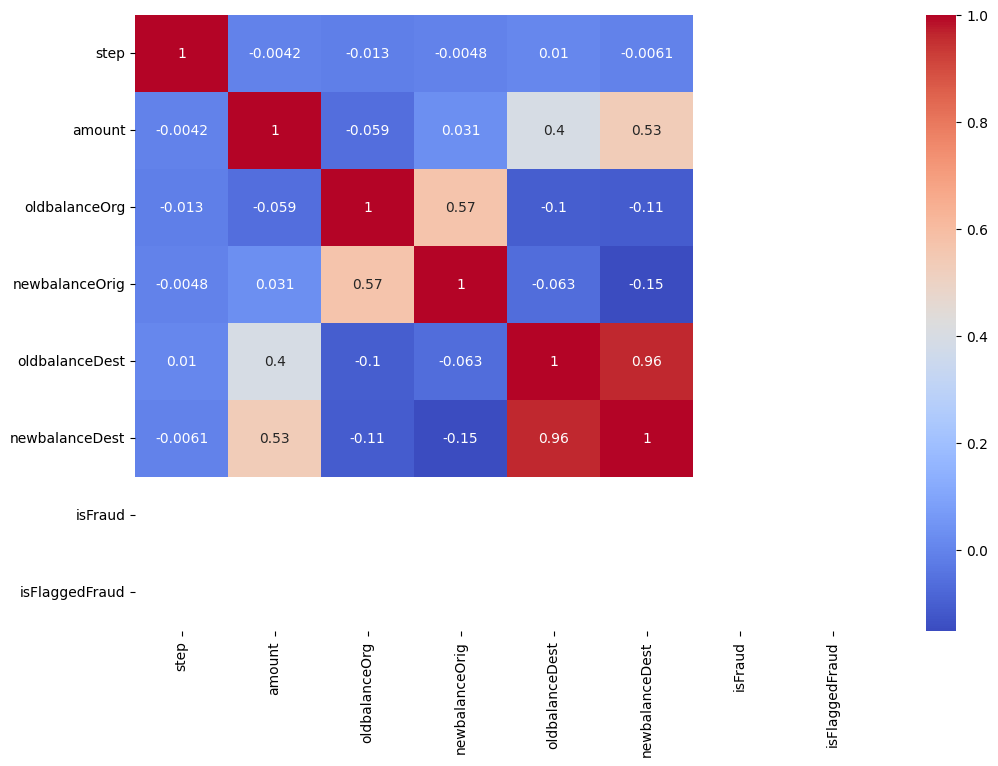

KeyError: "['Fraud'] not found in axis"

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the data
data = pd.read_csv('/content/Fraud.csv')

# 1. Data Inspection
print("Data types:\n", data.dtypes)
print("Unique values in each column:\n", data.nunique())
print("First few rows:\n", data.head())

# Identify and separate categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=[np.number]).columns

# Convert categorical columns to numeric using Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    print(f"Encoding column: {col}")
    data[col] = label_encoder.fit_transform(data[col].astype(str))

# 2. Data Cleaning
## Handle Missing Values
# Fill missing values for numerical columns with median
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].median())

# Handle missing values for categorical columns if any
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

## Outliers Detection & Treatment
# Using IQR to detect and cap outliers for numerical columns
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define a cap
cap = 1.5 * IQR
data = data[~((data[numerical_cols] < (Q1 - cap)) | (data[numerical_cols] > (Q3 + cap))).any(axis=1)]

## Multicollinearity
# Checking correlations only for numerical columns
corr_matrix = data[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Drop one of the highly correlated variables if correlation > 0.8
threshold = 0.8
to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > threshold)]

# Ensure dropping columns happens on a copy of the DataFrame
data = data.drop(columns=to_drop).copy()

# 3. Feature Selection
X = data.drop(columns=['Fraud'])  # Assuming 'Fraud' is the target column
y = data['Fraud']
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Model Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

# 6. Key Factors in Fraud Prediction
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

# 7. Recommendations for Prevention
print("Consider implementing multi-factor authentication, regular auditing, and machine learning-based anomaly detection systems.")

# 8. Monitoring Implementation Success
print("Monitor metrics such as a decrease in fraud detection rate and analyze post-implementation data.")


Column Names:
 Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')
Data types:
 step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object
Unique values in each column:
 step                  210
type                    5
amount            2445809
nameOrig          2667126
oldbalanceOrg      886853
newbalanceOrig    1155975
nameDest          1132643
oldbalanceDest    1536055
newbalanceDest    1373969
isFraud                 2
isFlaggedFraud          1
dtype: int64
First few rows:
    step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0 

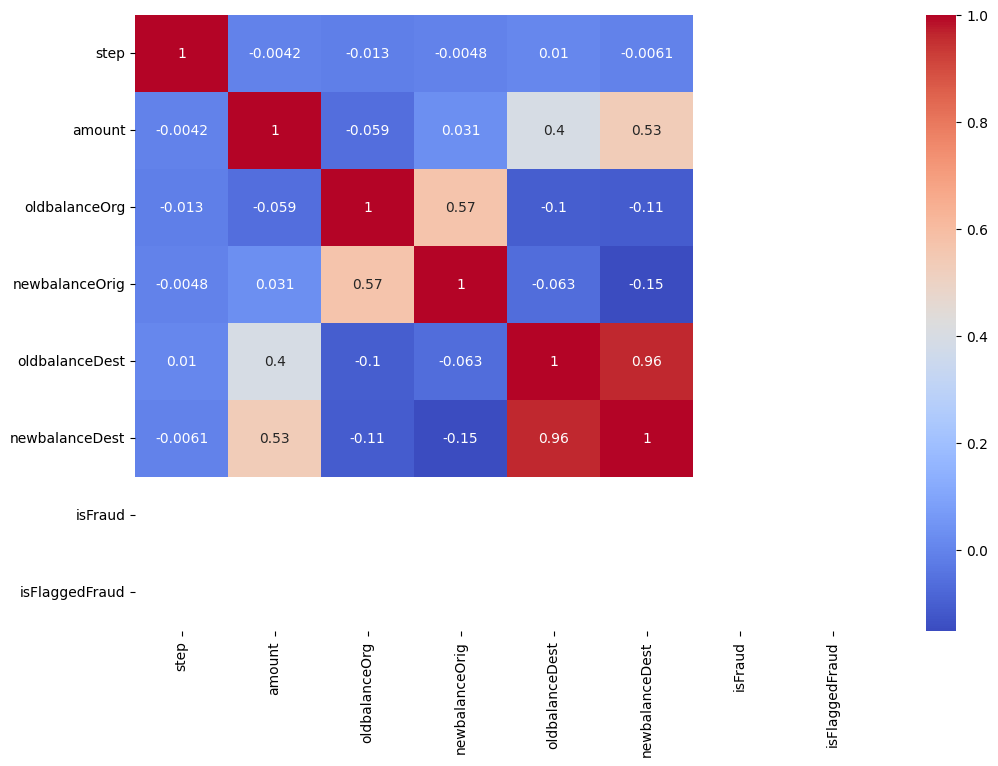

KeyError: "['IsFraud'] not found in axis"

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the data
data = pd.read_csv('/content/Fraud.csv')

# Inspect the columns to find the correct target column
print("Column Names:\n", data.columns)

# After identifying the correct target column, replace 'Fraud' with the correct column name.
# For example, if the column name is 'IsFraud', update the code as follows:

# Assuming the correct target column name is 'IsFraud'
target_column = 'IsFraud'  # Replace this with the correct column name

# 1. Data Inspection
print("Data types:\n", data.dtypes)
print("Unique values in each column:\n", data.nunique())
print("First few rows:\n", data.head())

# Identify and separate categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=[np.number]).columns

# Convert categorical columns to numeric using Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    print(f"Encoding column: {col}")
    data[col] = label_encoder.fit_transform(data[col].astype(str))

# 2. Data Cleaning
## Handle Missing Values
# Fill missing values for numerical columns with median
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].median())

# Handle missing values for categorical columns if any
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

## Outliers Detection & Treatment
# Using IQR to detect and cap outliers for numerical columns
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define a cap
cap = 1.5 * IQR
data = data[~((data[numerical_cols] < (Q1 - cap)) | (data[numerical_cols] > (Q3 + cap))).any(axis=1)]

## Multicollinearity
# Checking correlations only for numerical columns
corr_matrix = data[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Drop one of the highly correlated variables if correlation > 0.8
threshold = 0.8
to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > threshold)]

# Ensure dropping columns happens on a copy of the DataFrame
data = data.drop(columns=to_drop).copy()

# 3. Feature Selection
X = data.drop(columns=[target_column])  # Replace 'Fraud' with the correct target column name
y = data[target_column]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Model Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

# 6. Key Factors in Fraud Prediction
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

# 7. Recommendations for Prevention
print("Consider implementing multi-factor authentication, regular auditing, and machine learning-based anomaly detection systems.")

# 8. Monitoring Implementation Success
print("Monitor metrics such as a decrease in fraud detection rate and analyze post-implementation data.")
